In [34]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [35]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "postgres"
HOST = "localhost"
PORT = 5432
DATABASE = "crowdfundingdata"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [36]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
--------
contact_id INTEGER
first_name VARCHAR(30)
last_name VARCHAR(30)
email VARCHAR(50)

category
--------
category_id CHAR(4)
category VARCHAR(20)

subcategory
--------
subcategory_id VARCHAR(6)
subcategory VARCHAR(20)

campaign
--------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(75)
description VARCHAR(100)
goal NUMERIC
pledged NUMERIC
outcome VARCHAR(10)
backers_count INTEGER
country CHAR(5)
currency CHAR(5)
launch_date DATE
end_date DATE
category_id CHAR(4)
subcategory_id VARCHAR(6)



In [ ]:
#Analysis

In [37]:
conn = engine.connect()

In [5]:
query = text(f"""select c.category, count(cam.cf_id) as number_of_campaigns
from category c
join campaign cam on c.category_id = cam.category_id
group by c.category
order by number_of_campaigns desc;
""")

df = pd.read_sql(query, con=conn)
df.head()

,category,number_of_campaigns
0,theater,344
1,film & video,178
2,music,175
3,technology,96
4,publishing,67


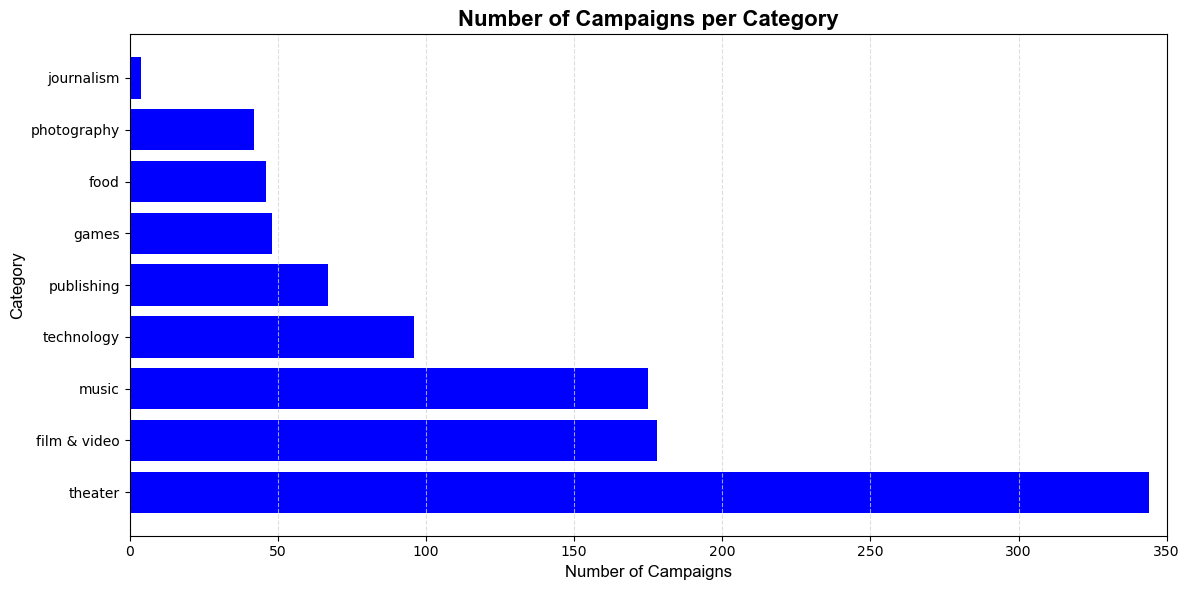

In [7]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(df.category, df.number_of_campaigns, color="blue", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Number of Campaigns", fontfamily="Arial", fontsize=12)
plt.ylabel("Category", fontfamily="Arial", fontsize=12)
plt.title("Number of Campaigns per Category", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.tight_layout()
plt.savefig("part4_categories.png")
plt.show()

In [22]:
query = text(f"""SELECT cam.outcome, COUNT(cam.outcome) AS outcome_count
FROM campaign cam
GROUP BY cam.outcome;
""")

df_outcome = pd.read_sql(query, con=conn)
df_outcome.head()

,outcome,outcome_count
0,failed,364
1,live,14
2,canceled,57
3,successful,565


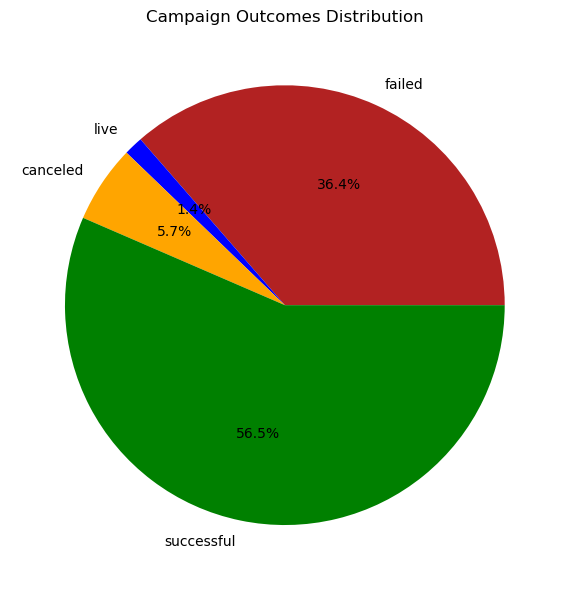

In [23]:

# Change Canvas Size
plt.figure(figsize=(6, 6))  

#creating the pie chart
# The colors of each section of the pie chart
colors = [ "firebrick", "blue","orange","green"]
plt.pie(df_outcome['outcome_count'], labels=df_outcome['outcome'], autopct='%1.1f%%', colors=colors)

# Customizing the chart
plt.title('Campaign Outcomes Distribution')


# Show/Save the Graph
plt.tight_layout()
plt.savefig("part4_campaign_outcome_distribution.png")
plt.show()

In [25]:
query = text(f"""select cam.country, count(cam.cf_id) as total_campaigns
from campaign cam
group by cam.country;

""")

df_country = pd.read_sql(query, con=conn)
df_country

,country,total_campaigns
0,AU,43
1,CA,44
2,DK,31
3,CH,23
4,US,763
5,IT,48
6,GB,48


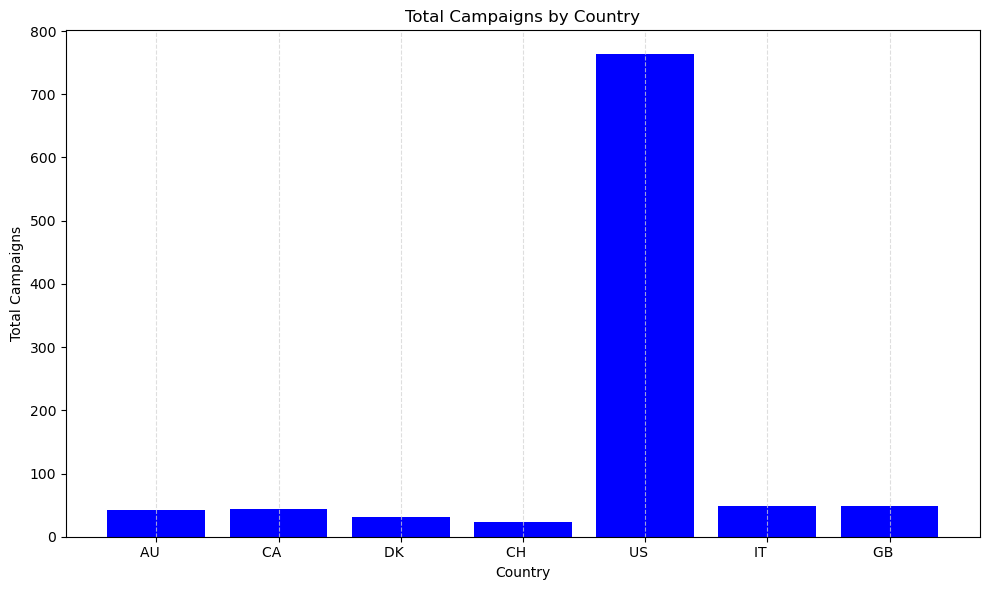

In [28]:
# Change Canvas Size
plt.figure(figsize=(10, 6)) 

# Create a basic plot
plt.bar(df_country['country'], df_country['total_campaigns'], color='blue')

# Customizing the chart
plt.title('Total Campaigns by Country')
plt.xlabel('Country')
plt.ylabel('Total Campaigns')


# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.tight_layout()
plt.savefig("part4_total_campaaigns_per_country.png")
plt.show()

In [38]:
query = text(f"""select c.category,cam.outcome, count(cam.outcome) as outcome_count
from category c
join campaign cam on c.category_id = cam.category_id
where upper(cam.outcome) in ('FAILED','SUCCESSFUL')
group by cam.outcome,c.category
order by outcome_count desc;
""")

df_successfail = pd.read_sql(query, con=conn)
df_successfail.head()

,category,outcome,outcome_count
0,theater,successful,187
1,theater,failed,132
2,film & video,successful,102
3,music,successful,99
4,music,failed,66


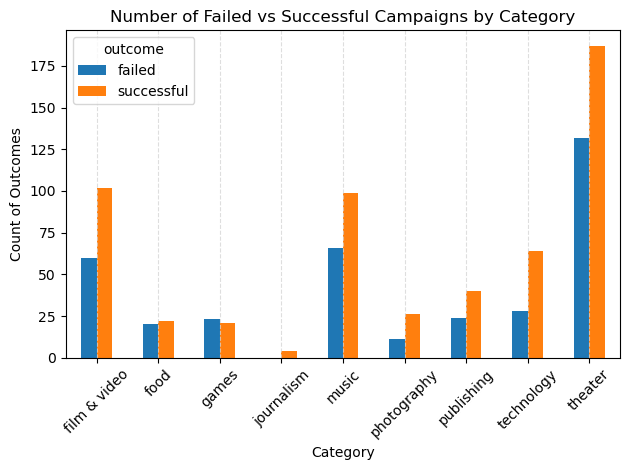

In [43]:
# Took help from chatgpt for this graph creation
# Plotting a grouped bar chart
# Pivot the table so that each outcome becomes a column
df_pivot = df_successfail.pivot(index='category', columns='outcome', values='outcome_count')
fig, ax = plt.subplots()
# Create a basic plot
df_pivot.plot(kind='bar', stacked=False,align="center",ax=ax)

# Customizing the chart
ax.set_xlabel('Category')
ax.set_ylabel('Count of Outcomes')
ax.set_title('Number of Failed vs Successful Campaigns by Category')

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("part4_succesful_failedoutcomes.png")
plt.show()

In [24]:
query = text(f"""select s.subcategory, count(cam.cf_id) as number_of_campaigns
from subcategory s
join campaign cam on s.subcategory_id = cam.subcategory_id
group by s.subcategory
order by number_of_campaigns asc;
""")

df_subcategory = pd.read_sql(query, con=conn)
df_subcategory.head()

,subcategory,number_of_campaigns
0,world music,3
1,audio,4
2,metal,7
3,radio & podcasts,8
4,mobile games,13


In [29]:
query = text(f"""select cam.company_name,con.last_name,con.email
from contacts con
join campaign cam on con.contact_id = cam.contact_id
order by cam.company_name asc;
""")

df_contacts = pd.read_sql(query, con=conn)
df_contacts.head()

,company_name,last_name,email
0,Acevedo-Huffman,Torres,andrew.torres@ruiz-torres.org
1,Acosta PLC,Gabbana,herma.gabbana@hotmail.com
2,"Acosta, Mullins and Morris",Iannelli,terri.iannelli@hotmail.com
3,Adams-Rollins,Angiolello,aurelia.angiolello@lord.com
4,Adams Group,Howell,jason.howell@gmx.de


In [31]:
conn.close()


In [32]:
engine.dispose()